# Table of contents

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\opetr\Desktop\PPP Loans'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '2. Data', '2. Prepared Data', 'clean_data.csv'), index_col = False)

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'LoanNumber', 'DateApproved', 'ProcessingMethod',
       'BorrowerCity', 'BorrowerState', 'BorrowerZip', 'LoanStatusDate',
       'LoanStatus', 'Term', 'InitialApprovalAmount', 'CurrentApprovalAmount',
       'ServicingLenderLocationID', 'ServicingLenderName',
       'RuralUrbanIndicator', 'BusinessAgeDescription', 'JobsReported',
       'BusinessType', 'OriginatingLenderLocationID', 'OriginatingLender',
       'NonProfit', 'ForgivenessAmount', 'ForgivenessDate'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,LoanNumber,DateApproved,ProcessingMethod,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,...,ServicingLenderName,RuralUrbanIndicator,BusinessAgeDescription,JobsReported,BusinessType,OriginatingLenderLocationID,OriginatingLender,NonProfit,ForgivenessAmount,ForgivenessDate
0,13,5502308207,2020-08-08,PPP,ANCHORAGE,AK,99503-7146,2021-07-22,Paid in Full,60,...,Northrim Bank,U,Existing or more than 2 years old,385.0,Limited Liability Company(LLC),116975,Northrim Bank,NaN,9615884.57,2021-06-11
1,14,6110847106,2020-04-14,PPP,BARROW,AK,99723,2021-08-21,Paid in Full,24,...,"National Cooperative Bank, National Association",R,Existing or more than 2 years old,295.0,Non-Profit Organization,89628,"National Cooperative Bank, National Association",Y,7761324.81,2021-07-13
2,15,4539098204,2020-08-06,PPP,Anchorage,AK,99502-1130,NaN,Exemption 4,60,...,Idaho First Bank,U,Existing or more than 2 years old,500.0,Corporation,436276,Idaho First Bank,NaN,4891430.37,2022-06-22
3,16,5120868804,2021-04-17,PPP,Anchorage,AK,99518-1105,2022-10-06,Paid in Full,60,...,First National Bank Alaska,U,Existing or more than 2 years old,500.0,501(c)3 – Non Profit,3386,First National Bank Alaska,Y,7321970.55,2022-09-13
4,17,6650277102,2020-04-14,PPP,HOMER,AK,99603,2021-06-09,Paid in Full,24,...,First National Bank Alaska,R,Existing or more than 2 years old,439.0,Corporation,3386,First National Bank Alaska,NaN,6598389.38,2021-05-18


In [7]:
df.shape

(968518, 23)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                          0
LoanNumber                          0
DateApproved                        0
ProcessingMethod                    0
BorrowerCity                        4
BorrowerState                       0
BorrowerZip                         5
LoanStatusDate                  37667
LoanStatus                          0
Term                                0
InitialApprovalAmount               0
CurrentApprovalAmount               0
ServicingLenderLocationID           0
ServicingLenderName                 0
RuralUrbanIndicator                 0
BusinessAgeDescription              1
JobsReported                        1
BusinessType                      719
OriginatingLenderLocationID         0
OriginatingLender                   0
NonProfit                      909179
ForgivenessAmount               29646
ForgivenessDate                 29646
dtype: int64

In [9]:
# Drop missing values from the JobsReported and ForgivenessAmount columns

df.dropna(subset = ['JobsReported', 'ForgivenessAmount'], inplace = True)

In [10]:
# Check that missing values were dropped

df.isnull().sum()

Unnamed: 0                          0
LoanNumber                          0
DateApproved                        0
ProcessingMethod                    0
BorrowerCity                        2
BorrowerState                       0
BorrowerZip                         3
LoanStatusDate                  13665
LoanStatus                          0
Term                                0
InitialApprovalAmount               0
CurrentApprovalAmount               0
ServicingLenderLocationID           0
ServicingLenderName                 0
RuralUrbanIndicator                 0
BusinessAgeDescription              1
JobsReported                        0
BusinessType                      692
OriginatingLenderLocationID         0
OriginatingLender                   0
NonProfit                      880515
ForgivenessAmount                   0
ForgivenessDate                     0
dtype: int64

##### Duplicates check

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(938871,)

##### Extreme values checks

C:\Users\opetr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='JobsReported', ylabel='Density'>

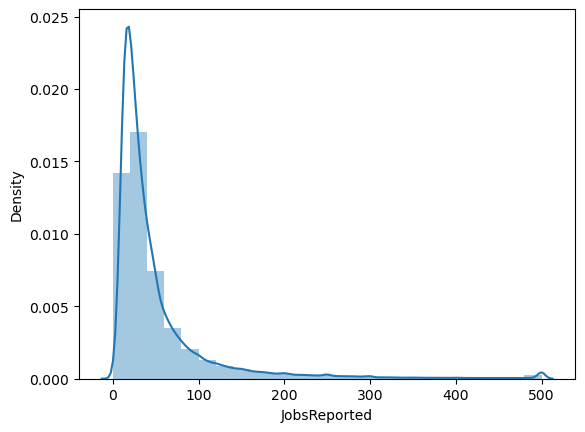

In [13]:
sns.distplot(df['JobsReported'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [14]:
df['JobsReported'].mean() # Check the mean

51.94376011187906

In [15]:
df['JobsReported'].median() # Check the median

30.0

In [16]:
df['JobsReported'].max() # Check the max

500.0

### 3. Data prep for regression analysis 

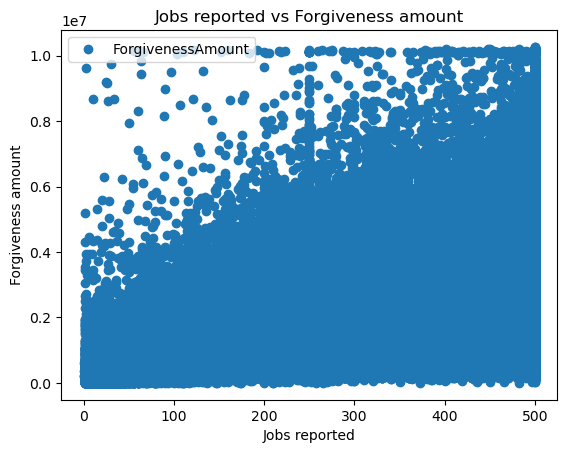

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'JobsReported', y='ForgivenessAmount',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Jobs reported vs Forgiveness amount')  
plt.xlabel('Jobs reported') 
plt.ylabel('Forgiveness amount')  
plt.show()

##### Hypothesis: The higher the number of employees, the higher the loan amount granted for a business.

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['JobsReported'].values.reshape(-1,1)
y = df['ForgivenessAmount'].values.reshape(-1,1)

In [19]:
X

array([[385.],
       [295.],
       [500.],
       ...,
       [  5.],
       [  7.],
       [ 11.]])

In [20]:
y

array([[9615884.57],
       [7761324.81],
       [4891430.37],
       ...,
       [ 150743.84],
       [ 152820.83],
       [ 152162.5 ]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

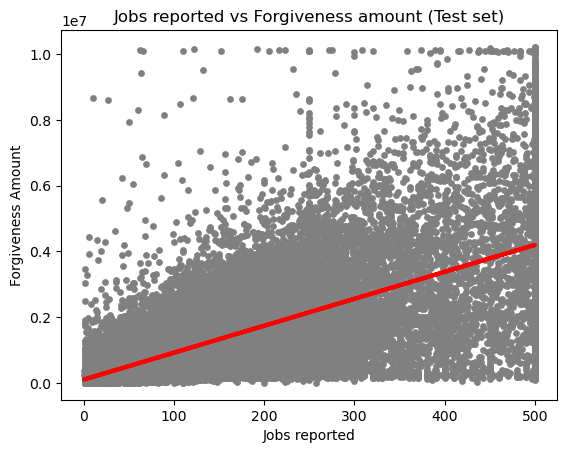

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Jobs reported vs Forgiveness amount (Test set)')
plot_test.xlabel('Jobs reported')
plot_test.ylabel('Forgiveness Amount')
plot_test.show()

##### Interpretation: There is on clear correlation between the two variables.

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8192.88528907]]
Mean squared error:  231119943658.79388
R2 score:  0.5636673967199015


In [28]:
y_predicted

array([[389681.69694111],
       [307752.84405039],
       [274981.3028941 ],
       ...,
       [266788.41760502],
       [610889.59974608],
       [373295.92636297]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,287842.08,3.896817e+05
1,227208.02,3.077528e+05
2,160609.80,2.749813e+05
3,274297.25,2.585955e+05
4,152061.09,2.340169e+05
5,343672.32,4.142604e+05
6,877431.36,5.207679e+05
7,1323643.14,3.666836e+06
8,556787.66,4.306461e+05
9,361816.32,2.585955e+05


##### Compare how the regression fits the training set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8192.88528907]]
Mean squared error:  232572754286.28143
R2 score:  0.5672397272505553


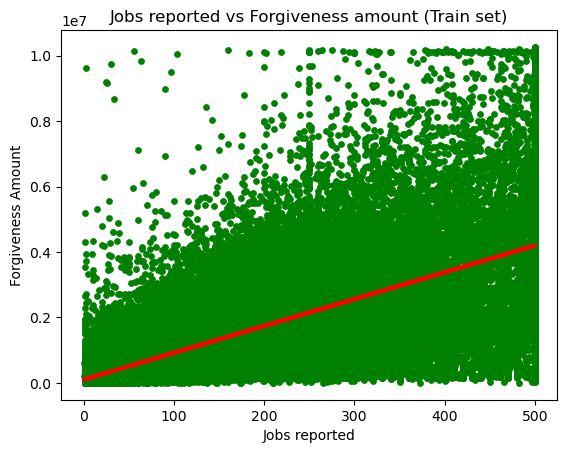

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Jobs reported vs Forgiveness amount (Train set)')
plot_test.xlabel('Jobs reported')
plot_test.ylabel('Forgiveness Amount')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [34]:
# Clean the extreme values from the JobsReported variable observed during the consistency checks.

df_test = df[df['JobsReported'] <=200] 

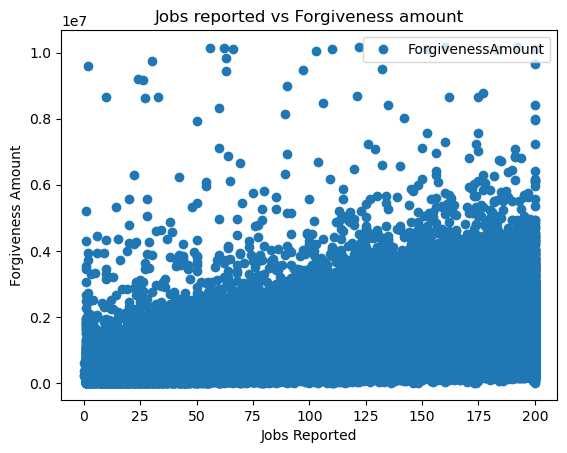

In [35]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'JobsReported', y='ForgivenessAmount', style='o')  
plt.title('Jobs reported vs Forgiveness amount')  
plt.xlabel('Jobs Reported')  
plt.ylabel('Forgiveness Amount')  
plt.show()

In [36]:
# Reshape again.

X_2 = df_test['JobsReported'].values.reshape(-1,1)
y_2 = df_test['ForgivenessAmount'].values.reshape(-1,1)

In [37]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [38]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [39]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [40]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [41]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8599.45510981]]
Mean squared error:  87512109795.73683
R2 score:  0.5138097904898514


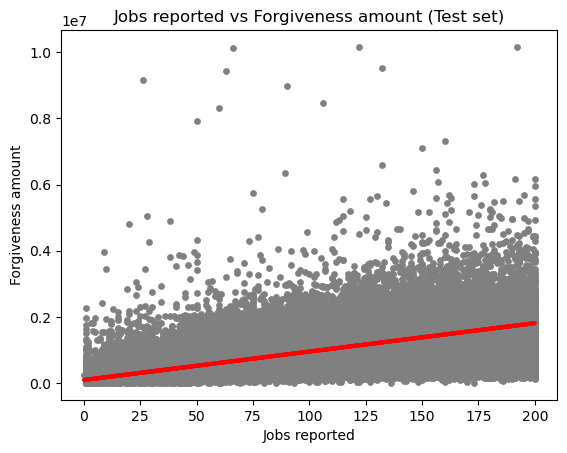

In [42]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Jobs reported vs Forgiveness amount (Test set)')
plot_test.xlabel('Jobs reported')
plot_test.ylabel('Forgiveness amount')
plot_test.show()

In [43]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,332331.21,4.499101e+05
1,353323.33,2.263243e+05
2,840818.25,6.304987e+05
3,336932.68,4.241117e+05
4,498311.62,5.875014e+05
5,344522.79,4.327112e+05
6,206578.42,2.435232e+05
7,1364382.20,8.712834e+05
8,463798.99,6.906949e+05
9,207460.00,2.005259e+05


##### The analysis proves that there is no relationship between the size of a business (measured by the numbers of the employees it hires) and the loan amount granted through the PPP program.